In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the inflow data
r0 = pd.read_csv("../results/gross_daily.csv")
r1 = pd.read_csv("../results/gross_daily1.csv")
r2 = pd.read_csv("../results/gross_daily2.csv")

# reset the index to the column
r0 = r0.set_index("Unnamed: 0")
r1 = r1.set_index("Unnamed: 0")
r2 = r2.set_index("Unnamed: 0")

The date ranges are:
* r0: 6/16/19 - 6/14/20
* r1: 6/14/19 - 6/12/20
* r2: 6/15/19 - 6/13/20

In [3]:
# combining the data
df = r0.iloc[:-2, :3].add(r1.iloc[2:, :3]).add(r2.iloc[1:-1, :3])

In [4]:
# rename the index
df.index.names = ["date"]
# adding the bitcoin data
df = pd.concat([df, r1.iloc[2:, 3:]], axis=1)
# display our results
df.head()

,inflow,outflow,net,close,volume
2019-06-16,1046.092505,1018.100038,27.992467,9347.5,4612766979
2019-06-17,1356.584979,2696.357359,-1339.772379,9085.5,3970490506
2019-06-18,1854.365640,2379.794460,-525.428820,9287.5,2369675840
2019-06-19,1052.705569,1166.129359,-113.423790,9532.0,3404805996
2019-06-20,981.403525,770.421733,210.981791,10279.5,4982086264


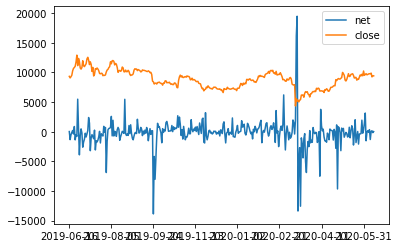

In [5]:
df[["net", "close"]].plot()

In [7]:
import statsmodels.tsa.stattools as ts 
result=ts.coint(df.net, df.close)
print(result)

In [8]:
df.net.diff().std()

3055.06014211948

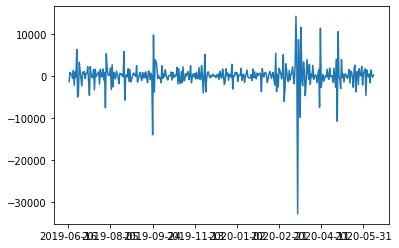

In [9]:
df.net.diff().plot()

In [10]:
df.to_csv("../results/inf_outf.csv")

In [11]:
import json

# read in the activity files
with open("../results/all_activity.json", 'r') as f:
    data0 = f.read()
    obj0 = json.loads(data0)
    
with open("../results/all_activity1.json", 'r') as f:
    data1 = f.read()
    obj1 = json.loads(data1)
    
with open("../results/all_activity2.json", 'r') as f:
    data2 = f.read()
    obj2 = json.loads(data2)

In [12]:
activity = {**obj0, **obj1, **obj2}

In [15]:
with open("../results/tot_activity.json", "w") as out:
    json.dump(activity, out)